In [1]:
# Web scrape Wikipedia example 2
%config Completer.use_jedi = False
import requests
import re
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd
import os

In [2]:
# URL of our webpage
webpage_url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_Republic_of_Ireland"
# webpage_url = "http://www.rte.ie"

In [3]:
response = requests.get(webpage_url)
response
soup = BeautifulSoup(response.content)

In [4]:
# find the <sup>  tags -> the citation elements -> we want to remove them 

supTags = soup.find_all('sup')

# get rid of them from the soup 
for tag in supTags:
    # decompose method will remove them from the soup 
    tag.decompose()

In [5]:
# scrape all text 
# get all the p,h1,h2 elements 

allTextTags = soup.select('p,h1,h2')
allTextTags

#print(allTextTags[4].prettify())
allTextTags[4].get_text()

webpageText = ''
for tag in allTextTags:
    webpageText += tag.get_text()
# print(webpageText)    

### <font color = 'red'>EXERCISE

1. using TextBlob and Pandas etc... 
2. analyse the overall sentimet of the text
3. translate it to Spanish and write it to a file called 'spanish.txt '
4. remove stop words 
5. perform word frequency analysis
6. create the DataFrame of words and frequencies 
7. do a bar plot of the words 
8. BONUS get all the tables from the page and display one or two of them    


In [6]:
# make a blob object 
blob = TextBlob(webpageText)
#blob

#Naive Bayes is a commonly used machine learning text-classification algorithm.

from textblob.sentiments import NaiveBayesAnalyzer
blob2 = TextBlob(webpageText , analyzer = NaiveBayesAnalyzer())

print(blob.sentiment)
print(blob2.sentiment)


Sentiment(polarity=0.06653738010355663, subjectivity=0.3545657202274849)
Sentiment(classification='pos', p_pos=1.0, p_neg=3.6566805521000285e-71)


In [7]:
# translate it to spanish 

# finding out the code for spanish 
blob3 = TextBlob('Buenos días')
blob3.detect_language()


spanish = str(blob.translate(to='es'))
spanish

with open('spanish.txt','w',encoding = 'UTF-8') as f :
    f.write(spanish) 

In [8]:
#getting the stop words from nltk library 

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [9]:
# making a dictionary word count 


frequency = {}

for word in blob.words.lower():
    if word not in stopwords:
        count = frequency.get(word, 0)
        frequency[word] = count + 1
    
frequency
df_dict = pd.DataFrame(frequency.items(),columns = ['word','count'])
df_dict.shape
frequency
len(frequency)

1190

In [10]:
# tokenise the text -> split it into words - unique words 
#all_words = set(blob.words)
#all_words

# to count 
#blob.word_counts

<AxesSubplot:ylabel='word'>

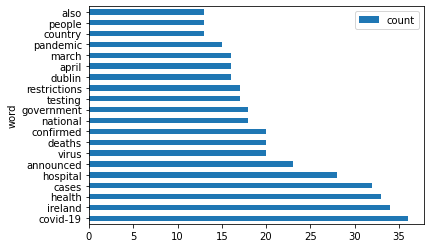

In [11]:
df2 =pd.DataFrame(frequency.items(),columns =['word','count'])
df2.sort_values(by='count', ascending= False,inplace = True)
df2[0:21]
df2 =df2[df2['word']!="\'s"]
df2.set_index('word',inplace = True)
df2.head(20).plot(kind= 'barh',)


In [12]:
### one cell to do it all using blob 

items = blob.word_counts.items()
print(type(items))

#getting rid of the stop words
items =[item for item in items if item [0] not in stopwords]

# itemgetter getting second element from the tuple which is the count 
from operator import itemgetter

sorted_items = sorted(items,key =itemgetter(1),reverse = True)

# getting top 20 words 
top20 = sorted_items[0:21]
top20
df = pd.DataFrame(top20,columns = ['word','count'])
len(sorted_items)


<class 'dict_items'>


1189

In [13]:
top20

[('covid-19', 36),
 ('ireland', 34),
 ('health', 33),
 ('cases', 32),
 ('hospital', 28),
 ('announced', 23),
 ('confirmed', 20),
 ('virus', 20),
 ('deaths', 20),
 ('government', 18),
 ('national', 18),
 ('testing', 17),
 ('restrictions', 17),
 ('march', 16),
 ('dublin', 16),
 ('april', 16),
 ('pandemic', 15),
 ('people', 13),
 ('also', 13),
 ('country', 13),
 ('public', 12)]

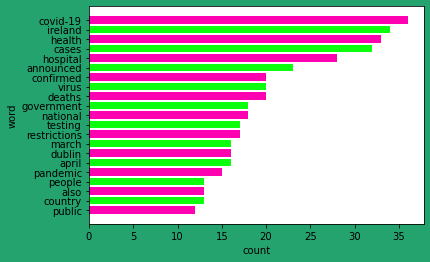

In [14]:
import matplotlib.pyplot as plt 
plt.figure(facecolor='#25a36f')


plt.barh(df["word"],df["count"],color=["#fe01b1","#0cff0c"])


plt.gca().invert_yaxis() 

# Axis Labels
plt.ylabel("word")
plt.xlabel("count")

plt.show()

In [15]:
# we can use spacy to do the nlp analysis

import spacy

#specifyiung the english language 
nlp = spacy.load('en_core_web_sm')


In [17]:
# we can process the document using spacy object 

document = nlp(webpageText)
type(document)

spacy.tokens.doc.Doc

In [21]:
# looking for named entities 
#document.ents

for entity in document.ents:
    print(f"{entity.text:<40}{entity.label_}")

the Republic of Ireland                 GPE
the Republic of Ireland                 GPE
29 February 2020                        DATE
three weeks                             DATE
12 March                                DATE
St Patrick's                            PERSON
Day                                     DATE
Taoiseach                               PERSON
Leo Varadkar                            PERSON
that night                              TIME
24 March                                DATE
up to four                              CARDINAL
Three days later                        DATE
27 March                                DATE
The Garda Síochána                      PERSON
18                                      CARDINAL
The Leaving Certificate                 WORK_OF_ART
Junior Certificate                      PERSON
Irish                                   NORP
summer                                  DATE
Gaeltacht                               PERSON
The All-Ireland Senior Footbal

In [24]:
# show all the person's found in the text 
for entity in document.ents:
    if entity.label_ == 'PERSON':
        print(entity.text)

St Patrick's
Taoiseach
Leo Varadkar
The Garda Síochána
Junior Certificate
Gaeltacht
Dublin Pride
Dáil Éireann
Feb

Jun
Jun
Kevin Kelleher
Cillian de Gascun
Tony Holohan
de Gascun
Daniel McConnell
Taoiseach Leo Varadkar
Monaghan
Taoiseach Leo Varadkar
Holohan
Ronan Glynn
Taoiseach Leo Varadkar
Simon Harris
Holohan
Holohan
Taoiseach Leo Varadkar
Tony Holohan
Cong Abbey
Kilkenny Castle
Knocknarea
Trim Castle
Taoiseach Micheál Martin
Ceann Comhairle Seán
Stephen Donnelly
Taoiseach Micheál Martin
Taoiseach Micheál Martin
Tony Holohan
Samuel Beckett
George Bernard Shaw
William Butler
Operation Fortitude
William Butler
Tinryland GFC's
St Vincent's
County Mayo
Tallaght Stadium
Cork
Donegal
Enfer
County Kildare
Genomics Medicine Ireland Limited
Enfer
De Gascun
Simon Harris
Sligo
St John's
Seán O'Rourke
Cavan
Cavan
Heather Humphreys
Cavan
Monaghan
Cavan
Monaghan
Ersatz
An Garda Síochána
Iarnród Éireann
